After reviewing some ML and data analysis skills in the teaching module we will now review these concepts in this assignment. We will work with the same ML model on different data sets then before. still, one is continuous and one is discrete. We will first import the same essential libraries as before.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

We will first work with our discrete data set. This data set is about predicting solar flares so our target variables (y-data) will be the common, moderate and severe flare categories. The other categories are our feature categories (x-data).

In [2]:
DF_D = pd.read_csv ("Full_Sun_Data")
DF_D

,Unnamed: 0,modified Zurich class,largest spot size,spot distribution,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,common flares,moderate flares,severe flares
0,0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,4,D,A,O,1,3,1,1,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,1384,H,S,X,1,2,1,1,1,1,1,0,0,0
1385,1385,H,S,X,2,2,1,1,2,1,1,0,0,0
1386,1386,C,S,O,1,2,1,2,2,1,1,0,0,0
1387,1387,H,R,X,1,2,1,1,2,1,1,0,0,0


First, we wish to find out some basic information on our data set. Find the column names, if there are any NaN values and check for any duplicated values too.

In [3]:
DF_D.columns 

Index(['Unnamed: 0', 'modified Zurich class', 'largest spot size',
       'spot distribution', 'activity', 'evolution',
       'previous 24 hour flare activity', 'historically-complex',
       'became complex on this pass', 'area', 'area of largest spot',
       'common flares', 'moderate flares', 'severe flares'],
      dtype='object')

In [5]:
DF_D.isna ().sum ()
#rember you can always use DF_D = DF_D.dropna()

Unnamed: 0                         0
modified Zurich class              0
largest spot size                  0
spot distribution                  0
activity                           0
evolution                          0
previous 24 hour flare activity    0
historically-complex               0
became complex on this pass        0
area                               0
area of largest spot               0
common flares                      0
moderate flares                    0
severe flares                      0
dtype: int64

In [6]:
DF_D.duplicated ().sum ()

0

The first column is a second index. We don't need two so we can delete this first column.

In [36]:
del DF_D["Unnamed: 0"]

In [8]:
DF_D #works

,modified Zurich class,largest spot size,spot distribution,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,common flares,moderate flares,severe flares
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,H,S,X,1,2,1,1,1,1,1,0,0,0
1385,H,S,X,2,2,1,1,2,1,1,0,0,0
1386,C,S,O,1,2,1,2,2,1,1,0,0,0
1387,H,R,X,1,2,1,1,2,1,1,0,0,0


To check that you can manipulate the column names go through and rename each column to the same but with the first letter capitalized.

In [37]:
dict_I = {"modified Zurich class": "Modified Zurich Class", "largest spot size" : "Largest Spot Size", "spot distribution": "Spot Distribution",
         "activity" : "Activity", "evolution" : "Evolution", "previous 24 hour flare activity" : "Previous 24 Hour Flare Activity", "historically-complex" : "Historically-complex",
          "became complex on this pass" : "Became Complex on this Pass", "area" : "Area", "area of largest spot" : "Area of Largest Spot",
          "common flares" : "Common Flares", "moderate flares" : "Moderate Flares",
         "severe flares" : "Severe Flares"}
DF_D = DF_D.rename(columns = dict_I)
DF_D

,Modified Zurich Class,Largest Spot Size,Spot Distribution,Activity,Evolution,Previous 24 Hour Flare Activity,Historically-complex,Became Complex on this Pass,Area,Area of Largest Spot,Common Flares,Moderate Flares,Severe Flares
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,H,S,X,1,2,1,1,1,1,1,0,0,0
1385,H,S,X,2,2,1,1,2,1,1,0,0,0
1386,C,S,O,1,2,1,2,2,1,1,0,0,0
1387,H,R,X,1,2,1,1,2,1,1,0,0,0


# Data Splitting
We can now encode some of our X data, some of the data is already encoded but some is not. Use a map on the first two columns and OneHotEncoder one the third (the rest are encoded).

In [38]:
DF_D["Modified Zurich Class"].unique()
map_1 = {"A" : 0, "B" : 1, "C" : 2, "D" : 3, "E" : 4, "F" : 5, "G" : 6, "H" : 7}
DF_D["Modified Zurich Class"] = DF_D["Modified Zurich Class"].replace (map_1)
DF_D["Modified Zurich Class"].unique () 

array([2, 3, 1, 5, 7, 4], dtype=int64)

In [40]:
DF_D["Largest Spot Size"].unique()
map_2 = {"A" : 0, "B" : 1, "C" : 2, "D" : 3, "E" : 4, "F" : 5, "G" : 6, "H" : 7, "R" : 7, "K" : 8, "X" : 9, "S" : 10}
DF_D["Largest Spot Size"] = DF_D["Largest Spot Size"].replace (map_2)
DF_D["Largest Spot Size"].unique () 

array([10,  0,  8,  7,  9], dtype=int64)

For the first Zurich column we can expirement with an inverse map. This may be usefull to help us understand our results more. To do this, define an inverse map and use replace again. 

In [12]:
map_1_inv = {0 : "A", 1 : "B", 2 : "C", 3 : "D", 4 : "E", 5 : "F", 6 : "G", 7 : "H"}
DF_D["Modified Zurich Class"] = DF_D["Modified Zurich Class"].replace (map_1_inv)
DF_D["Modified Zurich Class"].unique () 

array(['C', 'D', 'B', 'F', 'H', 'E'], dtype=object)

In [14]:
from sklearn.preprocessing import OneHotEncoder #we inport the nessassary module
ohe = OneHotEncoder (sparse_output=False) #initalize

In [20]:
DF_D.columns

Index(['Modified Zurich Class', 'Largest Spot Size', 'Activity', 'Evolution',
       'Previous 24 Hour Flare Activity', 'Historically-complex',
       'Became Complex on this Pass', 'Area', 'Area of Largest Spot',
       'Common Flares', 'Moderate Flares', 'Severe Flares', '0', '1', '2',
       '3'],
      dtype='object')

In [41]:
Data = DF_D["Activity"]
Data = Data.to_numpy ()    #sometimes this row is needed if you get the expected 2D got 1D error
Data = Data.reshape (-1,1)
Array = ohe.fit_transform(Silly_Data)
Array = pd.DataFrame (Array)
map_dict = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}
Array = Array.rename (columns = map_dict)
DF_D = DF_D.join (Array) #can only have one 
del DF_D["Activity"]

try to decode the column with the inverse one hot encodered now

In [27]:
Array = ohe.inverse_transform(Array)
Array = pd.DataFrame (Array)
Array

,0
0,O
1,O
2,O
3,O
4,O
...,...
1384,X
1385,X
1386,O
1387,X


In [28]:
DF_D.columns #works

Index(['Unnamed: 0', 'Modified Zurich Class', 'Largest Spot Size',
       'Spot Distribution', 'Evolution', 'Previous 24 Hour Flare Activity',
       'Historically-complex', 'Became Complex on this Pass', 'Area',
       'Area of Largest Spot', 'Common Flares', 'Moderate Flares',
       'Severe Flares', '0', '1', '2', '3'],
      dtype='object')

In [42]:
DF_D

,Modified Zurich Class,Largest Spot Size,Spot Distribution,Evolution,Previous 24 Hour Flare Activity,Historically-complex,Became Complex on this Pass,Area,Area of Largest Spot,Common Flares,Moderate Flares,Severe Flares,0,1,2,3
0,2,10,O,2,1,1,2,1,2,0,0,0,0.0,0.0,1.0,0.0
1,3,10,O,3,1,1,2,1,2,0,0,0,0.0,0.0,1.0,0.0
2,2,10,O,3,1,1,2,1,1,0,0,0,0.0,0.0,1.0,0.0
3,3,10,O,3,1,1,2,1,2,0,0,0,0.0,0.0,1.0,0.0
4,3,0,O,3,1,1,2,1,2,0,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,7,10,X,2,1,1,1,1,1,0,0,0,0.0,0.0,0.0,1.0
1385,7,10,X,2,1,1,2,1,1,0,0,0,0.0,0.0,0.0,1.0
1386,2,10,O,2,1,2,2,1,1,0,0,0,0.0,0.0,1.0,0.0
1387,7,7,X,2,1,1,2,1,1,0,0,0,0.0,0.0,0.0,1.0


We can now devide up our data into x and y as described above. Do so then use a test train split of 80/20 and random seed 10. While We have already encoded our X data our Y data is a bit diffrent. Our Logistic Regression module can only take one Y column at a time but we have three, so, we will run it three times, one for each column.

In [43]:
Common_Flares = DF_D ["Common Flares"]
Common_Flares

0       0
1       0
2       0
3       0
4       0
       ..
1384    0
1385    0
1386    0
1387    0
1388    0
Name: Common Flares, Length: 1389, dtype: int64

In [44]:
Moderate_Flares = DF_D ["Moderate Flares"]
Moderate_Flares

0       0
1       0
2       0
3       0
4       0
       ..
1384    0
1385    0
1386    0
1387    0
1388    0
Name: Moderate Flares, Length: 1389, dtype: int64

In [45]:
Severe_Flares = DF_D ["Severe Flares"]
Severe_Flares

0       0
1       0
2       0
3       0
4       0
       ..
1384    0
1385    0
1386    0
1387    0
1388    0
Name: Severe Flares, Length: 1389, dtype: int64

In [46]:
DF_D.columns

Index(['Modified Zurich Class', 'Largest Spot Size', 'Spot Distribution',
       'Evolution', 'Previous 24 Hour Flare Activity', 'Historically-complex',
       'Became Complex on this Pass', 'Area', 'Area of Largest Spot',
       'Common Flares', 'Moderate Flares', 'Severe Flares', '0', '1', '2',
       '3'],
      dtype='object')

In [48]:
#Now, define our x data (use all other columns into one dataframe)
x = {"modified Zurich class" : DF_D["Modified Zurich Class"], "largest spot size" : DF_D["Largest Spot Size"], "evolution" : DF_D["Evolution"],
    "previous 24 hour flare activity" : DF_D["Previous 24 Hour Flare Activity"], "historically-complex" : DF_D["Historically-complex"],
    "became complex on this pass" : DF_D["Became Complex on this Pass"], "area" : DF_D["Area"], "area of largest spot" : DF_D["Area of Largest Spot"],
    "0" : DF_D["0"], "1" : DF_D["1"], "2" :DF_D["3"]}
x = pd.DataFrame (x)
x.head (10) #good

,modified Zurich class,largest spot size,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,0,1,2
0,2,10,2,1,1,2,1,2,0.0,0.0,0.0
1,3,10,3,1,1,2,1,2,0.0,0.0,0.0
2,2,10,3,1,1,2,1,1,0.0,0.0,0.0
3,3,10,3,1,1,2,1,2,0.0,0.0,0.0
4,3,0,3,1,1,2,1,2,0.0,0.0,0.0
5,3,0,2,1,1,2,1,2,0.0,0.0,0.0
6,3,0,2,1,1,2,1,1,0.0,0.0,0.0
7,3,0,2,1,1,2,1,2,0.0,0.0,0.0
8,3,8,3,1,1,2,1,2,0.0,0.0,0.0
9,2,7,3,1,1,2,1,1,0.0,0.0,0.0


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder ()

In [50]:
Common_encoded_labels = encoder.fit_transform (Common_Flares) 

In [51]:
from sklearn.model_selection import train_test_split
X_test, X_train = train_test_split (x, test_size = 0.2,random_state = 10) #80/20 split, randomize with seed 1
Y_test, Y_train = train_test_split (Common_encoded_labels, test_size = 0.2,random_state = 10) #80/20 split, randomize with seed 1

In [52]:
from sklearn.linear_model import LogisticRegression #gives us logistic regression itself
from sklearn.metrics import accuracy_score#will let us test the modle's accuracy

In [53]:
clf = LogisticRegression(random_state=0) #initalize
clf.fit(X_train, Y_train)

C:\Users\tim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [54]:
Y_pred = clf.predict(X_test)

In [55]:
acc = accuracy_score(Y_test, Y_pred)
print("Logistic Regression model accuracy on common flare(in %) is", acc*100) #why might it be less accurate

Logistic Regression model accuracy on common flare(in %) is 84.69846984698471


In [56]:
#now for the second data set
Moderate_encoded_labels = encoder.fit_transform (Moderate_Flares) 

In [57]:
X_test_II, X_train_II = train_test_split (x, test_size = 0.2,random_state = 10) #80/20 split, randomize with seed 1
Y_test_II, Y_train_II = train_test_split (Moderate_encoded_labels, test_size = 0.2,random_state = 10) #80/20 split, randomize with seed 1

In [58]:
clf.fit(X_train_II, Y_train_II)
Y_pred_II = clf.predict(X_test_II)
acc_II = accuracy_score(Y_test_II, Y_pred_II)
print("Logistic Regression model accuracy on moderate flares (in %) is", acc_II*100) 

Logistic Regression model accuracy on moderate flares (in %) is 94.95949594959497


C:\Users\tim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
#for the third group
Severe_encoded_labels = encoder.fit_transform (Severe_Flares) 

In [60]:
X_test_III, X_train_III = train_test_split (x, test_size = 0.2,random_state = 10) #80/20 split, randomize with seed 1
Y_test_III, Y_train_III = train_test_split (Severe_encoded_labels, test_size = 0.2,random_state = 10) #80/20 split, randomize with seed 1

In [61]:
clf.fit(X_train_III, Y_train_III)
Y_pred_III = clf.predict(X_test_III)
acc_III = accuracy_score(Y_test_III, Y_pred_III)
print("Logistic Regression model accuracy on severe flares (in %) is", acc_III*100)

Logistic Regression model accuracy on severe flares (in %) is 99.09990999099911


In [62]:
#we can now do the same but with the random forest package, this time use only 50 trees and random state 25
from sklearn.ensemble import RandomForestClassifier #gives us the Randomforest classifier itself

rf_classifier = RandomForestClassifier(n_estimators=50, random_state=25) #initlize with 50 trees

In [63]:
rf_classifier.fit(X_train, Y_train)
Y_predict = rf_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predict)
print("The Random Forest module's model accuracy on common flares (in %) is", accuracy*100)

The Random Forest module's model accuracy on common flares (in %) is 80.73807380738074


In [64]:
rf_classifier.fit(X_train_II, Y_train_II)
Y_predict_II = rf_classifier.predict(X_test_II)
accuracy_II = accuracy_score(Y_test_II, Y_predict_II)
print("The Random Forest module's model accuracy on moderate flares (in %) is", accuracy_II*100)

The Random Forest module's model accuracy on moderate flares (in %) is 92.7992799279928


In [65]:
rf_classifier.fit(X_train_III, Y_train_III)
Y_predict_III = rf_classifier.predict(X_test_III)
accuracy_III = accuracy_score(Y_test_III, Y_predict_III)
print("The Random Forest module's model accuracy on severe flares (in %) is", accuracy_III*100)

The Random Forest module's model accuracy on severe flares (in %) is 98.64986498649864


Let's take one of our modles and make some predictsions.

In [68]:
New_Data = [[1,0,1,2,1,1,1,2,1,0,1]] #fix
New_Prediction = clf.predict (New_Data)
New_Prediction #there will be no solar active under this regiem

C:\Users\tim\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Feel free to try different ways of encoding the data and different train test splits to see the effects on the module. Have fun.

# Continuous Data Set
Let's now start with the continuous data set. Load the data 'Oscilloscope_Data_I' and name it DF_C

In [69]:
DF_C = pd.read_csv ("Oscilloscope_Data_I.csv")
DF_C

,Record Length,2.50E+03,Unnamed: 2,-0.00000249,-0.008
0,Sample Interval,2.00E-09,NaN,-0.000002,-0.016
1,Trigger Point,1.25E+03,NaN,-0.000002,-0.016
2,NaN,NaN,NaN,-0.000002,-0.024
3,NaN,NaN,NaN,-0.000002,-0.032
4,NaN,NaN,NaN,-0.000002,-0.024
...,...,...,...,...,...
2494,NaN,NaN,NaN,0.000003,-0.040
2495,NaN,NaN,NaN,0.000003,-0.040
2496,NaN,NaN,NaN,0.000003,-0.032
2497,NaN,NaN,NaN,0.000003,-0.048


It is sometimes important to open your data in, for instance, excel, in order to see what it really looks like. In this case, we can see that the first three columns give our information on the data and not any data itself. Therefore, you can delete these columns.

In [70]:
del DF_C ["Record Length"]
del DF_C ["2.50E+03"]
del DF_C ["Unnamed: 2"]

This works well but our column names are still off. We note pandas read these first entries as titles hence this mistake. To fix this, we wish to rename the columns of the DataFrame. 

In [71]:
#Dict = {"x_data" : -0.00000249, "y_data" : -0.008}
Dict = {"-0.00000249" : 'x_data', "-0.008" : "y_data"}

DF_C = DF_C.rename (columns = Dict)
DF_C

,x_data,y_data
0,-0.000002,-0.016
1,-0.000002,-0.016
2,-0.000002,-0.024
3,-0.000002,-0.032
4,-0.000002,-0.024
...,...,...
2494,0.000003,-0.040
2495,0.000003,-0.040
2496,0.000003,-0.032
2497,0.000003,-0.048


Next, find some information about this dataframe: The mean, Maximum, Minimum and Standard Deviation. Do this with both .describe () and the commands for those specific values.

In [72]:
DF_C.describe ()

,x_data,y_data
count,2.499000e+03,2499.000000
mean,1.000000e-08,-0.015462
std,1.443087e-06,0.111561
min,-2.488000e-06,-0.248000
25%,-1.239000e-06,-0.040000
50%,1.000000e-08,-0.032000
75%,1.259000e-06,-0.016000
max,2.508000e-06,0.984000


In [73]:
#alternativly
DF_C["x_data"].max () #2.508e-06
DF_C["x_data"].min () #-2.488e-06
DF_C["x_data"].std () #1.443086968966183e-06

1.443086968966183e-06

# Data Splitting
To further our understanding of this data, graph it in matplotlib. Use a red plot and lable the axis and title.

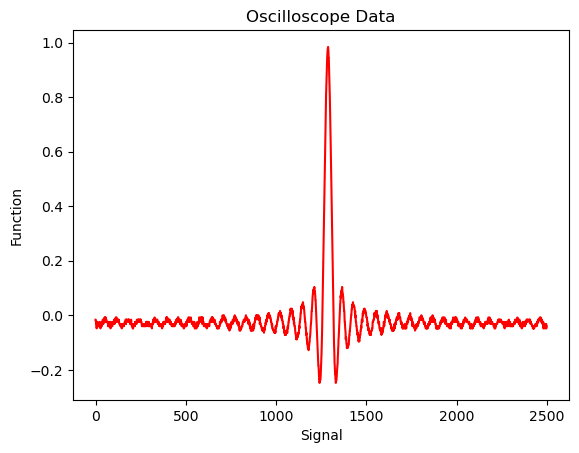

In [74]:
plt.plot (DF_C["y_data"], 'r')
plt.title ("Oscilloscope Data")
plt.xlabel ("Signal")
plt.ylabel ('Function')
plt.show ()

We can see that this is some kind of wave. As this was an electronically generated signal, we should be able to generate a sufficiently complex function (probably by Fourier Series if nothing else) to account for it wholly. However, here, we just want to select and approximate the curve with a quadratic. You may think of this as a Taylor Series if you like. 

In [75]:
#first I will remove some of the data for you
min_values = list ()
for k in np.arange (len (DF_C["x_data"])):
    if DF_C["y_data"][k] == -0.248: #finds the minimum value (should have two)
        min_values.append (k)
print (min_values)

[1241, 1331]


This tells us that entries 1241 and 1331 are the two minimum points. We now want to remove all points prior two and after these points such that only the central peak remains

In [76]:
for k in np.arange (1241):
    DF_C = DF_C.drop(k)

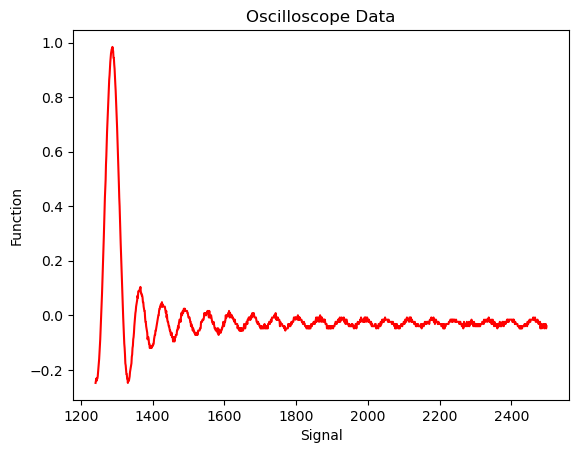

In [77]:
#regraph to see effect
plt.plot (DF_C["y_data"], 'r')
plt.title ("Oscilloscope Data")
plt.xlabel ("Signal")
plt.ylabel ('Function')
plt.show ()

In [78]:
for k in np.arange (start = 1332, stop = 2499):
    DF_C = DF_C.drop(k)

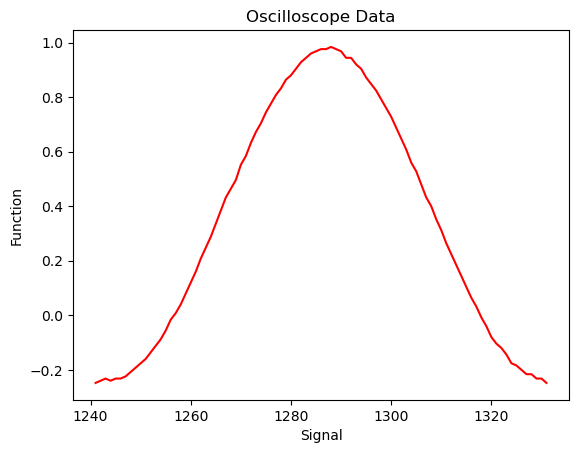

In [79]:
plt.plot (DF_C["y_data"], 'r')
plt.title ("Oscilloscope Data")
plt.xlabel ("Signal")
plt.ylabel ('Function')
plt.show ()

# Continuous Data Set Machine Learning
Let's now start with the continuous data set. Load the data 'Oscilloscope_Data_I' and name it DF_C
Now we have taken our data and split it into a curve. This may be significant in real life data if you are only interested in the peak. Now, we will use train test split to divide our data. Use random seed five and a 30/70 split. 

In [80]:
#we need to split our data again
from sklearn.model_selection import train_test_split #reload our test and train
X_test_C, X_train_C = train_test_split (DF_C["x_data"], test_size = 0.3,random_state = 5) #70/30 split, randomize with seed 5
Y_test_C, Y_train_C = train_test_split (DF_C["y_data"], test_size = 0.3,random_state = 5) #70/30 split, randomize with seed 5

We now will work with the linear regression module itself. However, whereas before we had linear data now we have a curve. load the polynomialFetures program from sklearn.prepossing and use it to graph the fit and measure chi-squared to see if our model is reasonable.

In [81]:
X_train_C = X_train_C.to_numpy ()
Y_train_C = Y_train_C.to_numpy()
X_test_C = X_test_C.to_numpy ()
Y_test_C = Y_test_C.to_numpy()

In [82]:
X_train_C = X_train_C.reshape (-1,1)
Y_train_C = Y_train_C.reshape (-1,1)
X_test_C = X_test_C.reshape (-1,1)
Y_test_C = Y_test_C.reshape (-1,1)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2, include_bias=False) #this allows us to use polynomial aspects, degree = 2 is for quodratics
X_poly = poly_feat.fit_transform(X_train_C)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y_train_C)
print(lin_reg.coef_, lin_reg.intercept_)

[[ 3.26463702e+07 -1.83540474e+14]] [-0.61766254]


In [84]:
Y_Predict =lin_reg.predict(poly_feat.transform(X_test_C))

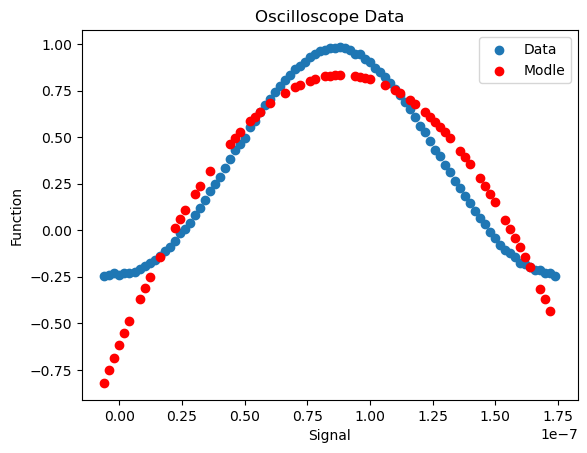

In [85]:
plt.scatter(DF_C["x_data"],DF_C["y_data"] )
plt.scatter (X_test_C,Y_Predict, c = "r")
plt.title ("Oscilloscope Data")
plt.xlabel ("Signal")
plt.ylabel ('Function')
plt.legend (["Data","Modle"])
plt.show ()

We can now see how our module compares with the data. Let us now check this data with a statistical test.

In [86]:
def Chi_test (Test,Predict):
    Top_list = list ()
    for k in np.arange(len(Test)):
        T = ((Test[k] - Predict[k])**2)/ Predict[k]
        Top_list.append (T)
    return (sum(Top_list))

In [88]:
print(f"our chi squared value is {Chi_test(Y_test_C,Y_Predict)}, for 90 degrees of freedom and an alpha value of 0.05 our critical value is 113. Therefore our modle passes")

our chi squared value is [2.5387273], for 90 degrees of freedom and an alpha value of 0.05 our critical value is 113. Therefore our modle passes


We can now also experiment with normilzation and standardization as we did before.

In [89]:
X = DF_C['x_data']
X = X.to_numpy ()
X = X.reshape (-1,1)

Y = DF_C['y_data']
Y = Y.to_numpy ()
Y = Y.reshape (-1,1)

In [90]:
#first we will scale our data from 0 to 1
from sklearn.preprocessing import MinMaxScaler #import

min_max = MinMaxScaler()  #initalize, you can min max to different sizes, this is especially usefull for graphic presentation

X = min_max.fit_transform(X) 
Y = min_max.fit_transform(Y) 

In [91]:
print (f" the maximum value of the x data is {X.max()}")
print (f" The minimum value of the x data is {X.min ()}")

print (f" the maximum value of the y data is {Y.max()}")
print (f" The minimum value of the y data is {Y.min ()}")

 the maximum value of the x data is 1.0
 The minimum value of the x data is 0.0
 the maximum value of the y data is 1.0
 The minimum value of the y data is 0.0


In [92]:
#we can also standardize our data
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler() #standardization sets the mean to be zero and the verance to be one

X = scaler.fit_transform(X) 
Y = scaler.fit_transform(Y)

In [93]:
#we can use these commands to get information on our x and y data
print (f" the mean value of the x data is {X.mean()}") #very close to zero
print (f" The standard deviation value of the x data is {X.std ()}")

print (f" the mean value of the y data is {Y.mean()}")
print (f" The standard deviation value of the y data is {Y.std ()}")

 the mean value of the x data is 1.0492217595358622e-16
 The standard deviation value of the x data is 1.0
 the mean value of the y data is 2.1960455432145954e-16
 The standard deviation value of the y data is 0.9999999999999999


Copyright Note:
    
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.